# House Price Prediction using XgBoost Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## importing the dataset

In [3]:
# Load train dataset
train_data = pd.read_csv('D:/Github-work/House-Price-Prediction/train.csv')


In [4]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
train_data.shape

(1460, 81)

In [7]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display null values in all columns
print(train_data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## Feature Engineering

In [11]:
train_data["TotalBaths"] = train_data["FullBath"] + train_data["BsmtFullBath"] + 0.5*(train_data["HalfBath"]+train_data["BsmtHalfBath"])
train_data["TotalArea"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"]


In [12]:
train_data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','GrLivArea','TotalBsmtSF'], axis=1, inplace=True)

### Imputting Missing values in Columns

In [13]:
# imputting missing values in  Columns
train_data['TotalArea'].fillna(train_data['TotalArea'].median(), inplace=True)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data['GarageArea'].fillna(train_data['GarageArea'].median(), inplace=True)

In [14]:
train_data.shape

(1460, 77)

## Visualizing Correlation Heatmap

In [15]:
correlation = train_data.corr()

<AxesSubplot:>

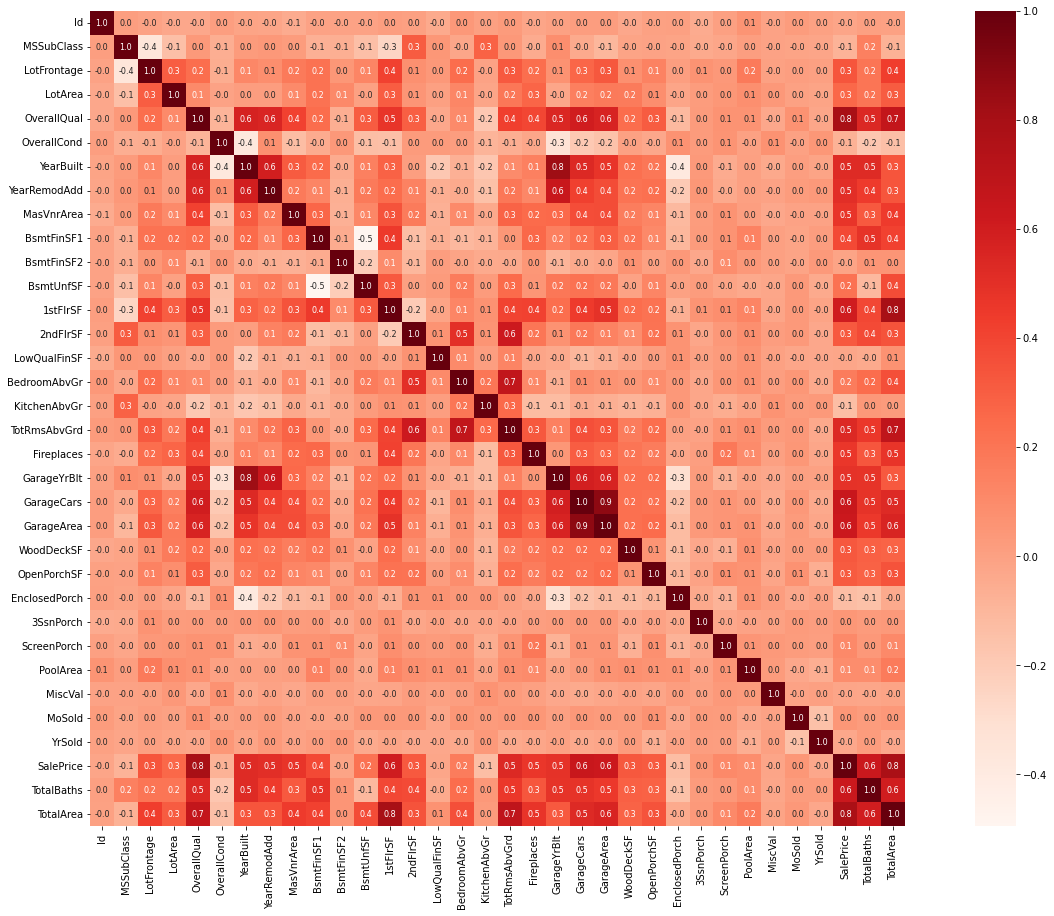

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

##### Here we can see different columns that are highly corerlated with each other: '1stFlrSF' is highly positive correlated with 'TotalArea' and 'saleprice' with 'OverallQual' further 'GarageYrBlt' with 'YearBuilt' and 'GarageCars' with 'GarageArea' and 'saleprice' with 'TotalArea'

### Feature Selection and Encoding

In [79]:
# Selecting numeric features
numeric_features = train_data[['LotFrontage', 'OverallQual', 'TotalArea', 
                               'GarageArea','TotalBaths','TotRmsAbvGrd']]

# Selecting categorical features and performing one-hot encoding
categorical_features = train_data[['ExterQual','SaleCondition']]
categorical_features = pd.get_dummies(categorical_features, drop_first=True)

# Concatenate selected features
X = pd.concat([numeric_features, categorical_features], axis=1) 
# Target variable
y = train_data['SalePrice']


In [80]:
X.head()

,LotFrontage,OverallQual,TotalArea,GarageArea,TotalBaths,TotRmsAbvGrd,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2566,548,3.5,8,0,1,0,0,0,0,1,0
1,80.0,6,2524,460,2.5,6,0,0,1,0,0,0,1,0
2,68.0,7,2706,608,3.5,6,0,1,0,0,0,0,1,0
3,60.0,7,2473,642,2.0,7,0,0,1,0,0,0,0,0
4,84.0,8,3343,836,3.5,9,0,1,0,0,0,0,1,0


In [81]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

### Splitting the data into Training data and Test data

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [83]:
print(X.shape, X_train.shape, X_test.shape)

(1460, 14) (1022, 14) (438, 14)


## Model Training

In [84]:
model = XGBRegressor(learning_rate=0.1,
                     n_estimators=550,
                     max_depth=4) 
 # training the model with X_train
model.fit(X_train, y_train) 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=550, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Model Evaluation


In [85]:
train_predictions = model.predict(X_train)

In [86]:
# R squared error
score_1 = metrics.r2_score(y_train, train_predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_train, train_predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9904830391828646
Mean Absolute Error :  5619.71381941047


In [87]:
test_predictions = model.predict(X_test)

# R squared error
score_1 = metrics.r2_score(y_test, test_predictions)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, test_predictions)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.884181394568709
Mean Absolute Error :  18927.747449343606


## Visualizing the Fitted Model 

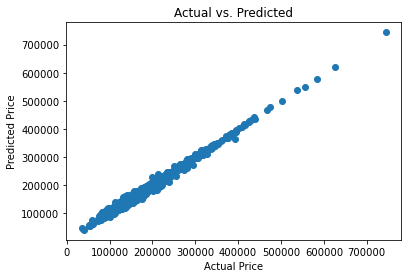

In [88]:
plt.scatter(y_train, train_predictions)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted")
plt.show()